## Data Warehouse - Semester Project
**Blood Banks - Data Warehouse**

------

**Connection**
Connect *SQL Server*  with  *Jupyter Notebook*

In [126]:
import pyodbc
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

In [127]:
conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
                      'Server=DESKTOP-LF6ARI5;'
                      'Database=GlobalBloodBank;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()
print('Connected!')

Connected!


### Query 2

In [128]:
query2= pd.read_sql_query('SELECT COUNT(F.bloodtype_id) as RequiredBlood, B.name as Name\
                            FROM fact_table F JOIN bloodtype B on F.bloodtype_id = B.bloodtype_id, Ailment A \
                            WHERE F.ailment_id = A.ailment_id \
                            GROUP BY F.bloodtype_id, B.name \
                            ORDER BY RequiredBlood DESC', \
                            conn)

**Table**

In [129]:
query2.head()

,RequiredBlood,Name
0,257,Fresh Frozen Plasma
1,255,Red Cells Concentration
2,246,Platelets
3,242,Whole Blood


**Visualization**

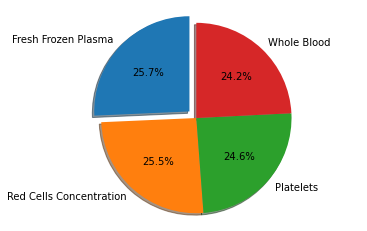

In [130]:
labels = list(query2['Name'])
sizes = list(query2['RequiredBlood'])
explode = (0.1, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

### Query 3

In [131]:
query3= pd.read_sql_query('SELECT G.gender, B.name as Name, COUNT(F.bloodtype_id) as RequiredBlood, B.Code as Code \
                            FROM fact_table F JOIN gender G on F.gender_id = G.gender_id \
                            Join bloodtype B on B.bloodtype_id = F.bloodtype_id, Ailment A \
                            WHERE F.ailment_id = A.ailment_id \
                            GROUP BY B.name, G.gender, B.code ORDER BY RequiredBlood DESC', \
                            conn)

**Table**

In [132]:
query3.head()

,gender,Name,RequiredBlood,Code
0,Male,Platelets,96,PLT
1,Other,Red Cells Concentration,96,RCC
2,Female,Fresh Frozen Plasma,88,FFP
3,Other,Fresh Frozen Plasma,88,FFP
4,Male,Whole Blood,86,WB


**Visualization**

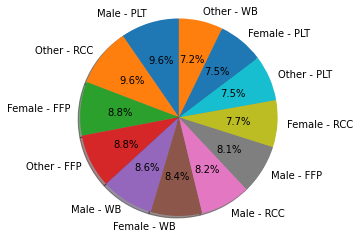

In [133]:
count = len(list(query3['gender']))
labels_list = []
for x in range (count):
    labels_list.append(list(query3['gender'])[x] +' - '+ list(query3['Code'])[x])

sizes = list(query3['RequiredBlood'])
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels_list, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

### Query 10

In [134]:
query10= pd.read_sql_query('SELECT T.year, SUM(C.value) as totalCostofBlood \
                            FROM fact_table F Join cost C on C.cost_id = F.cost_id JOIN time T on T.time_id = F.time_id \
                            GROUP BY T.year ORDER BY T.year DESC', \
                            conn)

**Table**

In [135]:
query10.head()

,year,totalCostofBlood
0,2020,17569.56
1,2019,40601.64
2,2018,47315.91
3,2017,20972.22
4,2016,10540.19


**Visualization**

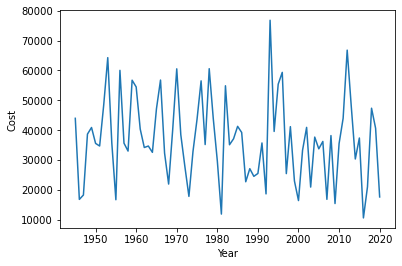

In [136]:
fig, ax = plt.subplots()
ax.plot(list(query10['year']), list(query10['totalCostofBlood']))
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()

### Query 11

In [137]:
query11= pd.read_sql_query('SELECT T.year, COUNT(F.time_id) as UsedBlood \
                            FROM fact_table F Join time T on T.time_id = F.time_id JOIN bloodtype B on B.bloodtype_id = F.bloodtype_id, Ailment A WHERE F.ailment_id = A.ailment_id \
                            GROUP BY T.year \
                            ORDER BY T.year', \
                            conn)

**Table**

In [140]:
query11.head(100)

,year,UsedBlood
0,1945,16
1,1946,5
2,1947,7
3,1948,14
4,1949,14
...,...,...
71,2016,6
72,2017,7
73,2018,17
74,2019,12


**Visualization**

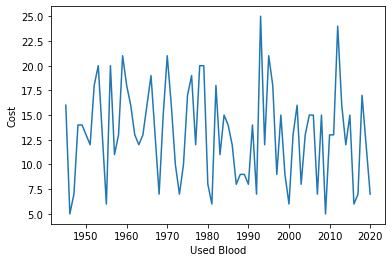

In [139]:
fig, ax = plt.subplots()
ax.plot(list(query11['year']), list(query11['UsedBlood']))
plt.xlabel('Year')
plt.ylabel('Blood Used')
plt.show()
